In [1]:
# pip install --upgrade numpy==1.26.4

In [238]:
import numpy as np
import pandas as pd

In [239]:
df = pd.read_csv("reddit_posts_PoliticalDiscusions.csv")

In [240]:
df.head()

,post_id,title,content,url,created_utc,subreddit,num_comments,upvotes,upvote_ratio,author
0,1gixvv3,What do you think is going to be a big surpris...,"Like the title states, what do you think is go...",NaN,2024-11-03 21:33:46,PoliticalDiscussion,9,2,1.00,HERKFOOT21
1,1gio43r,The cost of the inability to successful comple...,The United States has a significant chance of ...,NaN,2024-11-03 14:30:25,PoliticalDiscussion,12,3,0.67,the_original_Retro
2,1gin9zc,What Will the Non MAGA GOP do if trump loses?,Will they have to form a new party since Lara ...,NaN,2024-11-03 13:50:36,PoliticalDiscussion,43,14,0.76,ExpensivePiece7560
3,1giooyn,What specific features of political systems yo...,While the issue of senate confirmation has got...,NaN,2024-11-03 14:57:15,PoliticalDiscussion,54,10,0.73,Awesomeuser90
4,1gioe95,Brass tacks time: who wins between Trump vs Ha...,What does your gut feel who will win the presi...,NaN,2024-11-03 14:43:32,PoliticalDiscussion,252,0,0.43,TaylorSwiftian


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   post_id       919 non-null    object 
 1   title         919 non-null    object 
 2   content       919 non-null    object 
 3   url           0 non-null      float64
 4   created_utc   919 non-null    object 
 5   subreddit     919 non-null    object 
 6   num_comments  919 non-null    int64  
 7   upvotes       919 non-null    int64  
 8   upvote_ratio  919 non-null    float64
 9   author        919 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 71.9+ KB


In [242]:
df = df.drop('url', axis=1)
df = df.drop('subreddit', axis=1)

In [243]:
df.head()

,post_id,title,content,created_utc,num_comments,upvotes,upvote_ratio,author
0,1gixvv3,What do you think is going to be a big surpris...,"Like the title states, what do you think is go...",2024-11-03 21:33:46,9,2,1.00,HERKFOOT21
1,1gio43r,The cost of the inability to successful comple...,The United States has a significant chance of ...,2024-11-03 14:30:25,12,3,0.67,the_original_Retro
2,1gin9zc,What Will the Non MAGA GOP do if trump loses?,Will they have to form a new party since Lara ...,2024-11-03 13:50:36,43,14,0.76,ExpensivePiece7560
3,1giooyn,What specific features of political systems yo...,While the issue of senate confirmation has got...,2024-11-03 14:57:15,54,10,0.73,Awesomeuser90
4,1gioe95,Brass tacks time: who wins between Trump vs Ha...,What does your gut feel who will win the presi...,2024-11-03 14:43:32,252,0,0.43,TaylorSwiftian


In [244]:
print(df[['num_comments', 'upvotes', 'upvote_ratio']].describe())

       num_comments      upvotes  upvote_ratio
count    919.000000   919.000000    919.000000
mean     224.312296   146.575626      0.728194
std      314.749386   256.625182      0.229873
min        1.000000     0.000000      0.050000
25%       36.500000     1.000000      0.600000
50%      114.000000    37.000000      0.820000
75%      276.000000   173.000000      0.900000
max     3314.000000  1841.000000      1.000000


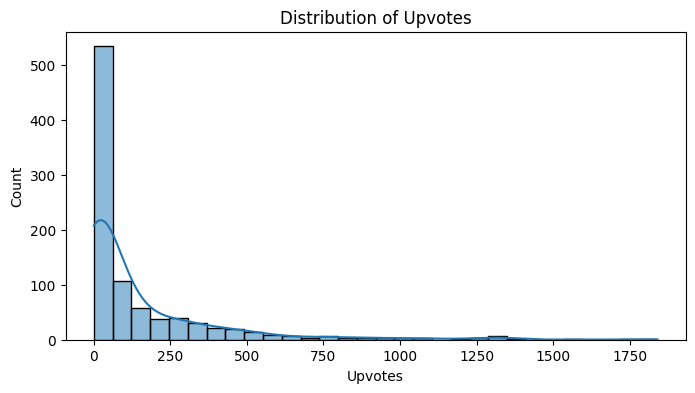

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df['upvotes'], bins=30, kde=True)
plt.title("Distribution of Upvotes")
plt.xlabel("Upvotes")
plt.show()

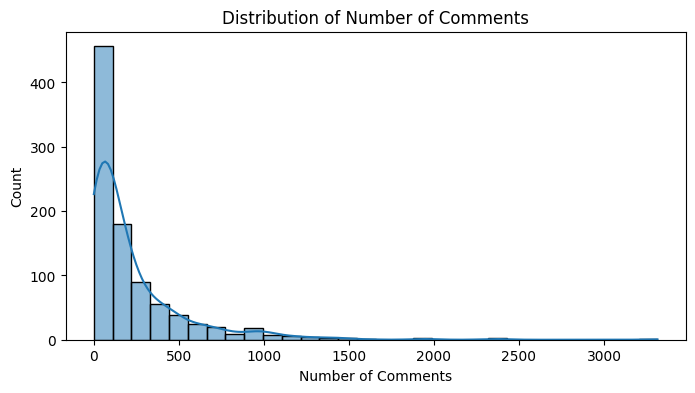

In [246]:
plt.figure(figsize=(8, 4))
sns.histplot(df['num_comments'], bins=30, kde=True)
plt.title("Distribution of Number of Comments")
plt.xlabel("Number of Comments")
plt.show()

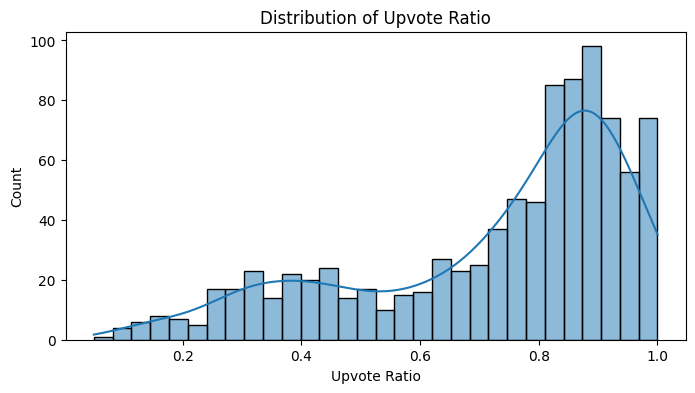

In [247]:
plt.figure(figsize=(8, 4))
sns.histplot(df['upvote_ratio'], bins=30, kde=True)
plt.title("Distribution of Upvote Ratio")
plt.xlabel("Upvote Ratio")
plt.show()

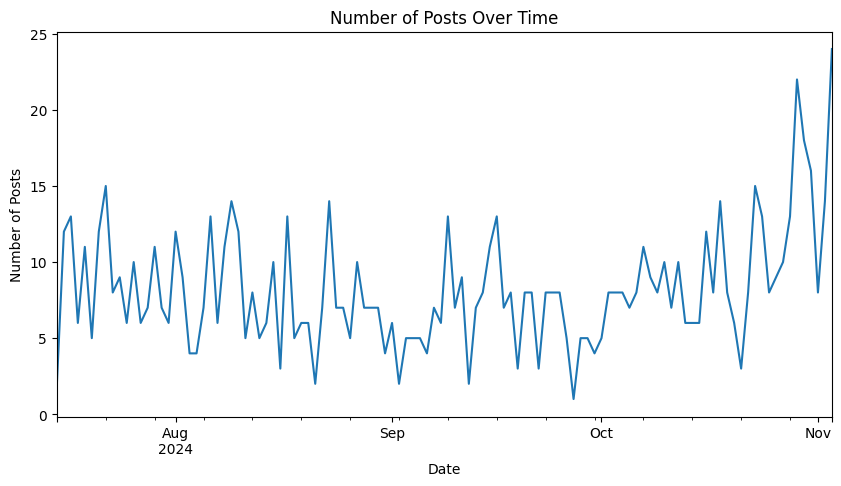

In [248]:
df['created_utc'] = pd.to_datetime(df['created_utc'])

plt.figure(figsize=(10, 5))
df.set_index('created_utc').resample('D').size().plot()
plt.title("Number of Posts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.show()

In [249]:
df['title_length'] = df['title'].apply(len)

In [250]:
df['content_length'] = df['content'].apply(lambda x: len(str(x)))

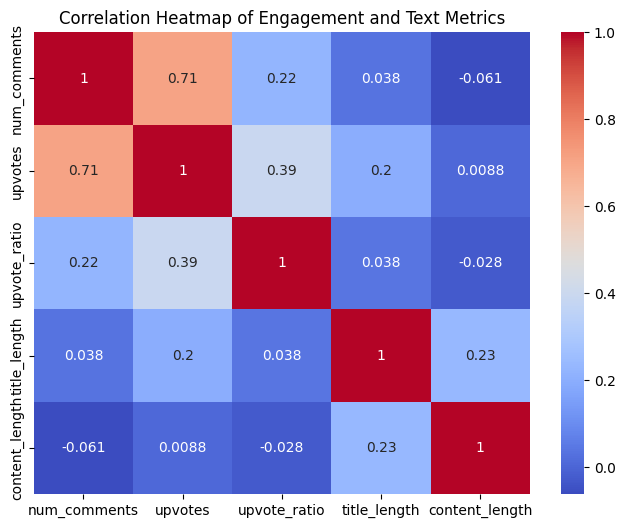

In [251]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['num_comments', 'upvotes', 'upvote_ratio', 'title_length', 'content_length']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Engagement and Text Metrics")
plt.show()

In [252]:
import spacy
import nltk

In [253]:
def tokenize(doc, lemmatized=False, remove_stopword=False, remove_punct = True, pos_tag = False):
  nlp = spacy.load("en_core_web_sm")
  doc = nlp(doc)

  tokens = []

  for token in doc:
      if remove_punct and token.is_punct:
          continue

      if remove_stopword and token.is_stop:
          continue

      token_text = token.lemma_ if lemmatized else token.text

      if len(token_text.strip()) == 0:
          continue

      token_text = token_text.lower()

      if pos_tag:
          tokens.append((token_text, token.pos_))
      else:
          tokens.append(token_text)

  return tokens

In [ ]:
tokenize_title = df['title'].apply(lambda x: tokenize(x, lemmatized=False, remove_stopword=True, remove_punct = True, pos_tag = False))

In [ ]:
tokenize_content = df['content'].apply(lambda x: tokenize(x, lemmatized=False, remove_stopword=True, remove_punct = True, pos_tag=False))

In [ ]:
df['tokenize_title'] = tokenize_title

In [ ]:
df['tokenize_content'] = tokenize_content 

In [35]:
df['all_text'] = df['tokenize_title'].apply(lambda x: ' '.join([word for word, pos in x])) + ' ' + df['tokenize_content'].apply(lambda x: ' '.join([word for word, pos in x]))

In [39]:
# df.to_csv('V2reddit_posts_PoliticalDiscusions_tokenized.csv', index=False)

In [263]:
df = pd.read_csv("V2reddit_posts_PoliticalDiscusions_tokenized.csv")

In [264]:
df.head()

,post_id,title,content,created_utc,num_comments,upvotes,upvote_ratio,author,title_length,content_length,tokenize_title,tokenize_content,all_text
0,1gixvv3,What do you think is going to be a big surpris...,"Like the title states, what do you think is go...",2024-11-03 21:33:46,9,2,1.00,HERKFOOT21,112,462,"[('think', 'VERB'), ('go', 'VERB'), ('big', 'A...","[('like', 'SCONJ'), ('title', 'NOUN'), ('state...",think go big surprise upset election exclude f...
1,1gio43r,The cost of the inability to successful comple...,The United States has a significant chance of ...,2024-11-03 14:30:25,12,3,0.67,the_original_Retro,86,1982,"[('cost', 'NOUN'), ('inability', 'NOUN'), ('su...","[('united', 'PROPN'), ('states', 'PROPN'), ('s...",cost inability successful complete bipartisans...
2,1gin9zc,What Will the Non MAGA GOP do if trump loses?,Will they have to form a new party since Lara ...,2024-11-03 13:50:36,43,14,0.76,ExpensivePiece7560,45,291,"[('non', 'PROPN'), ('maga', 'PROPN'), ('gop', ...","[('form', 'VERB'), ('new', 'ADJ'), ('party', '...",non maga gop trump lose form new party lara tr...
3,1giooyn,What specific features of political systems yo...,While the issue of senate confirmation has got...,2024-11-03 14:57:15,54,10,0.73,Awesomeuser90,94,1277,"[('specific', 'ADJ'), ('feature', 'NOUN'), ('p...","[('issue', 'NOUN'), ('senate', 'PROPN'), ('con...",specific feature political system general disa...
4,1gioe95,Brass tacks time: who wins between Trump vs Ha...,What does your gut feel who will win the presi...,2024-11-03 14:43:32,252,0,0.43,TaylorSwiftian,59,302,"[('brass', 'VERB'), ('tack', 'NOUN'), ('time',...","[('gut', 'NOUN'), ('feel', 'VERB'), ('win', 'V...",brass tack time win trump vs harris gut feel w...


In [265]:
corpus = df['all_text'].tolist()

In [266]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [267]:
tfidf_df.head()

,00,000,0001,000119312520074867,001,00132671,00149225,00158242,00169041,00171375,...,zelenskyy,zero,zgyw,zimbabwe,zinn,zionist,zone,zoomer,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
# pip install wordcloud

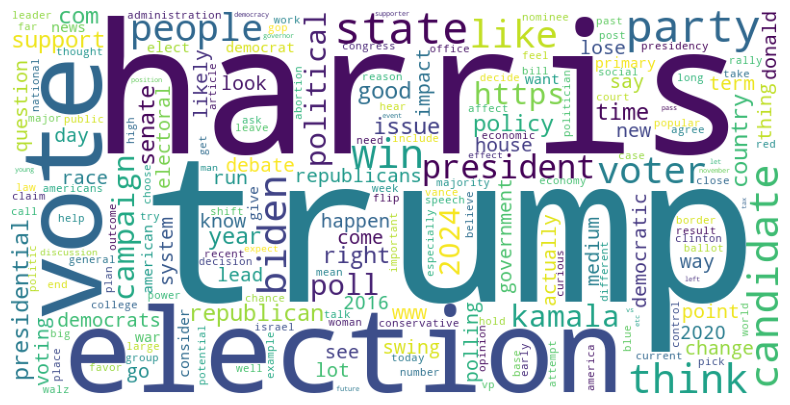

In [269]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)

word_freq = word_importance.to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [270]:
pos = pd.read_csv("positive-words-1.txt", header = None)
pos.head()

,0
0,a+
1,abound
2,abounds
3,abundance
4,abundant


In [271]:
neg = pd.read_csv("negative-words-1.txt", header = None)
neg.head()

,0
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


In [272]:
def calculate_sentiment_score(text):
    words = text.split()
    pos_count = sum(1 for word in words if word in pos.values)
    neg_count = sum(1 for word in words if word in neg.values)
    return (pos_count - neg_count)

In [273]:
df['sentiment_score'] = df['all_text'].apply(calculate_sentiment_score)

In [274]:
df['sentiment_score'].describe()

count    919.000000
mean       2.205658
std        5.841976
min      -32.000000
25%       -1.000000
50%        2.000000
75%        5.000000
max       42.000000
Name: sentiment_score, dtype: float64

In [ ]:
# plt.figure(figsize=(8, 4))
# plt.scatter(df['sentiment_score'], df['upvote_ratio'], alpha=0.6, color='blue', edgecolor='k')
# plt.title('Sentiment Score vs. Upvotes')
# plt.xlabel('Sentiment Score')
# plt.ylabel('Upvotes')
# plt.grid(True)
# plt.show()

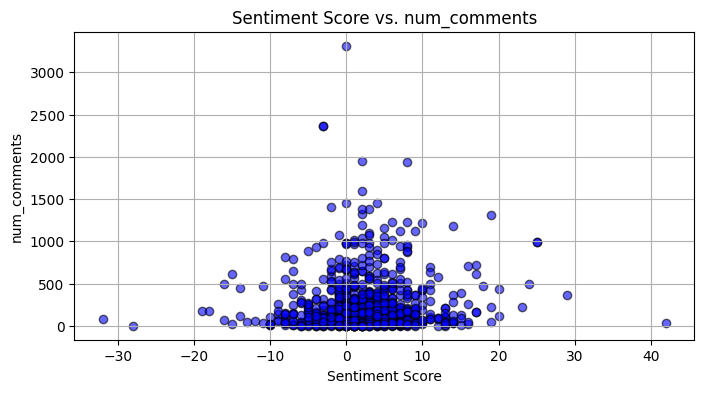

In [277]:
plt.figure(figsize=(8, 4))
plt.scatter(df['sentiment_score'], df['num_comments'], alpha=0.6, color='blue', edgecolor='k')
plt.title('Sentiment Score vs. num_comments')
plt.xlabel('Sentiment Score')
plt.ylabel('num_comments')
plt.grid(True)
plt.show()